In [2]:
import pandas as pd
import numpy as np
import itertools
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

ticker = 'ET'

data = yf.download(ticker, period='2y', interval='1d', progress=False)import yfinance as yf

In [3]:
ticker = 'ET'

Data = yf.download(ticker, period='2y', interval='1d', progress=False)

df = Data

# Assuming df has a DatetimeIndex, you can extract time indices directly
X = np.arange(len(df)).reshape(-1, 1)  
y = df['Close'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0][0]

print("The estimated slope of the linear regression for the closing price is:", slope)

The estimated slope of the linear regression for the closing price is: 0.00925363383998034


In [4]:
import altair as alt 

In [5]:
X = np.arange(len(df)).reshape(-1, 1)  
y = df['Close'].values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Create y_pred values
y_pred = model.predict(X)

# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Time': X.flatten(), 'Closing Price': y.flatten(), 'Predicted Closing Price': y_pred.flatten()})

# Create the scatter plot for actual closing prices
scatter_chart = alt.Chart(df_plot).mark_point().encode(
    x='Time',
    y='Closing Price',
    tooltip=['Time', 'Closing Price']
).properties(
    title='Linear Regression of Closing Price Over Time'
)

# Create the line plot for predicted closing prices
line_chart = alt.Chart(df_plot).mark_line(color='red').encode(
    x='Time',
    y='Predicted Closing Price',
    tooltip=['Time', 'Predicted Closing Price']
)

# Combine the scatter plot and line plot
combined_chart = scatter_chart + line_chart

# Save the chart
combined_chart.save('linear_regression_closing_price_over_time.json')

In [6]:
model = LinearRegression()
model.fit(df.index.values.astype('float64').reshape(-1, 1), df['Close'].values.reshape(-1, 1))  # Use original index values

# Create y_pred values (using original time index)
y_pred = model.predict(df.index.values.astype('float64').reshape(-1, 1))

# Create a DataFrame for plotting, preserving the original DatetimeIndex
df_plot = pd.DataFrame({
    'Time': pd.to_datetime(df.index),  # Convert back to DatetimeIndex
    'Closing Price': df['Close'].values,
    'Predicted Closing Price': y_pred.flatten()
})

# Base chart for both lines and points
base = alt.Chart(df_plot).encode(
    x=alt.X('Time:T', axis=alt.Axis(title='Date')),
    tooltip=['Time', alt.Tooltip('Closing Price:Q', title='Closing Price'), alt.Tooltip('Predicted Closing Price:Q', title='Predicted')]
).properties(
    title='Linear Regression of Closing Price Over Time'
)

# Create the scatter plot for actual closing prices
scatter_chart = base.mark_circle(size=60).encode(
    y=alt.Y('Closing Price:Q', axis=alt.Axis(title='Price')),
    color=alt.value('steelblue')  # Make points blue
)

# Create the line plot for predicted closing prices
line_chart = base.mark_line(color='firebrick').encode(
    y=alt.Y('Predicted Closing Price:Q')
)

# Combine the scatter plot and line plot
combined_chart = scatter_chart + line_chart

# Configure interactive features
combined_chart = combined_chart.interactive()  # Allow zooming and panning

# Save the chart
combined_chart.save('linear_regression_closing_price_over_time.html')  # Save as interactive HTML

In [7]:
# Create the scatter plot for actual closing prices
scatter_chart = base.mark_circle(size=20).encode(
    y=alt.Y('Closing Price:Q', axis=alt.Axis(title='Price')),
    color=alt.value('steelblue')  # Make points blue
)

# Create the line plot for predicted closing prices
line_chart = base.mark_line(color='firebrick').encode(
    y=alt.Y('Predicted Closing Price:Q')
)

# Combine the scatter plot and line plot
combined_chart = scatter_chart + line_chart

# Configure interactive features
combined_chart = combined_chart.interactive()  # Allow zooming and panning


In [8]:
combined_chart

alt.LayerChart(...)

In [9]:
scatter_chart_Data_Points = base.mark_circle(size=20).encode(
    y=alt.Y('Closing Price:Q', axis=alt.Axis(title='Price')),
    color=alt.value('steelblue')  # Make points blue
)

# Create the line plot for predicted closing prices
line_chart_Linear_Regression = base.mark_line(color='firebrick').encode(
    y=alt.Y('Predicted Closing Price:Q')
)

# Combine the scatter plot and line plot
combined_chart_Line_With_Scatter = scatter_chart_Data_Points + line_chart_Linear_Regression

# Configure interactive features
combined_chart_Line_With_Scatter = combined_chart_Line_With_Scatter.interactive()  # Allow zooming and panning

# Save the chart
combined_chart_Line_With_Scatter.save('linear_regression_closing_price_over_time.html')  # Save as interactive HTML

In [10]:
# Fit the linear regression model With Line Chart
# Create the Line plot for actual closing prices
line_chart_Data_Points = base.mark_line(color='blue', size=1).encode(
    y=alt.Y('Closing Price:Q', axis=alt.Axis(title='Price')),
    color=alt.value('steelblue')  
)
# Create the line plot for predicted closing prices
line_chart_Linear_Regression = base.mark_line(color='firebrick').encode(
    y=alt.Y('Predicted Closing Price:Q')
)

# Combine the scatter plot and line plot
combined_chart_Line_With_Line = line_chart_Data_Points + line_chart_Linear_Regression

# Configure interactive features
combined_chart_Line_With_Line = combined_chart_Line_With_Line.interactive()  # Allow zooming and panning

# Save the chart
combined_chart_Line_With_Line.save('linear_regression_closing_price_over_time_Line_Vs_Line.html')  # Save as interactive HTML

In [11]:
combined_chart_Line_With_Line

alt.LayerChart(...)

VWAP for ET: 12.95


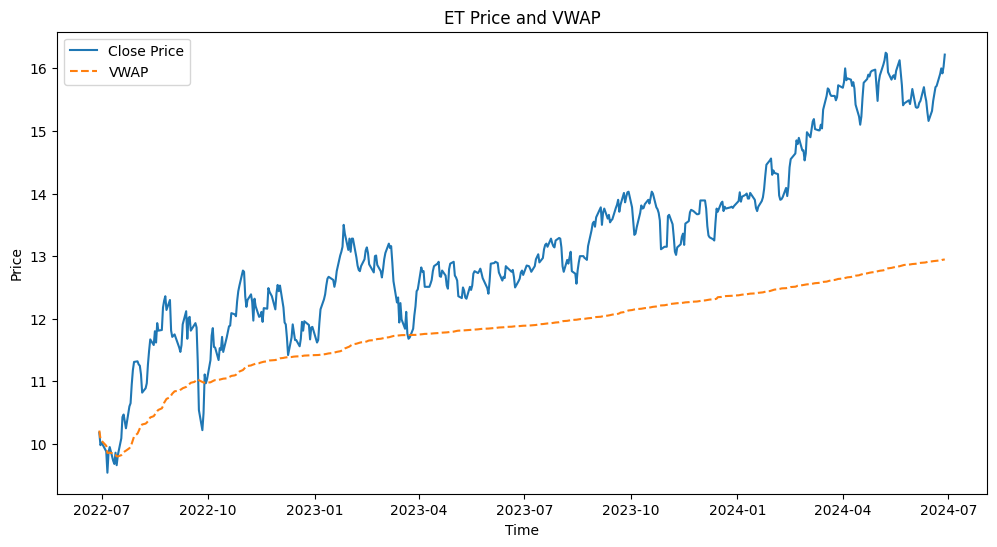

In [12]:
ticker = 'ET'

data = yf.download(ticker, period='2y', interval='1d', progress=False)

data['Typical Price'] = (data['High'] + data['Low'] + data['Close']) / 3

data['Cumulative TPV'] = (data['Typical Price'] * data['Volume']).cumsum()
data['Cumulative Volume'] = data['Volume'].cumsum()
data['VWAP'] = data['Cumulative TPV'] / data['Cumulative Volume']

vwap = data['VWAP'].iloc[-1]

print(f"VWAP for {ticker}: {vwap:.2f}")


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['VWAP'], label='VWAP', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{ticker} Price and VWAP')
plt.legend()
plt.show()

In [13]:
tickers2021 = ['ET']
Data = {}
for x in tickers2021:
  Data[x] = yf.download(x, period='2y', interval='1d', progress=False)

In [20]:

slope_parameter = []

for x in tickers2021:
  Temp = Data[x]
  X_train = np.array([i for i in range(len(Temp))]).reshape(-1, 1)
  y_train = Temp['Close'].values.reshape(-1, 1)
  model = LinearRegression()
  model.fit(X_train, y_train)
  slope_parameter.append([x, model.coef_[0][0]])

for x in slope_parameter:
  temp = x[1]*30/Data[x[0]]['Close'][-1]
  x[1] = temp
slope_parameter.sort(key=lambda x: x[1], reverse = True)
Top10_2 = slope_parameter[:10]

C:\Users\Bucsa\AppData\Local\Temp\ipykernel_15224\481762780.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = x[1]*30/Data[x[0]]['Close'][-1]


In [21]:
Top10_2 = slope_parameter[:10]

In [26]:
Scores3 =[]


for i in range(50):
  x = slope_parameter[i][0]
  Close = Data[x]['Close']
  p = q = range(0, 5)
  d = range(0, 3)
  pdq = list(itertools.product(p, d, q))
  results = []
  for param in pdq:
    try:
        model = sm.tsa.ARIMA(Close, order=param)
        model_fit = model.fit()
        results.append([param, model_fit.aic])
    except:
        continue
  results.sort(key=lambda x: x[1])
  best_params = results[0][0]
  model = sm.tsa.ARIMA(Close, order=best_params)
  model_fit = model.fit()
  forecast = model_fit.forecast(steps= 30)
  Scores3.append([x, 100*(forecast[540] - Close[-1])/Close[-1], best_params])

Scores3.sort(key=lambda x: x[1], reverse = True)
Top10_3 = Scores3[:10]
print(Top10_3)

c:\Users\Bucsa\Code\Stealth\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bucsa\Code\Stealth\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bucsa\Code\Stealth\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bucsa\Code\Stealth\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

KeyError: 540

In [24]:
Close = Data['ET']['Close']
p = q = range(5, 9)
d = range(3, 5)
pdq = list(itertools.product(p, d, q))
re = []
for param in pdq:
  try:
    model = sm.tsa.ARIMA(Close, order=param)
    model_fit = model.fit()
    re.append([param, model_fit.aic])
  except:
    continue
re.sort(key=lambda x: x[1])
best_params = results[0][0]
model = sm.tsa.ARIMA(Close, order=best_params)
model_fit = model.fit()
forecast = model_fit.forecast(steps= 30)


print(100 * (forecast[504] - Close[-1]) / Close[-1])

print(best_params)

plt.figure(figsize=(10, 6))
plt.plot(Close.index, Close, label='Actual Prices', color='blue')

future_dates = pd.date_range(start=Close.index[-1], periods=31)[1:]
plt.plot(future_dates, forecast, label='Future Predictions', color='red')

plt.title('ARIMA Model Prediction for ET')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

c:\Users\Bucsa\Code\Stealth\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bucsa\Code\Stealth\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bucsa\Code\Stealth\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bucsa\Code\Stealth\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starti

NameError: name 'results' is not defined